In [1]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

C:\Users\weezs\Anaconda3\envs\minjoo\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [12]:
df = pd.read_csv('data/ionosphere.csv')
df[:3]

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g


In [15]:
X = df.values[:,:-1]
y = df.values[:,-1]
print(y[:2])

['g' 'b']


In [16]:
print(X[:2])

[[1 0 0.99539 -0.05889 0.8524299999999999 0.02306 0.8339799999999999
  -0.37708 1.0 0.0376 0.8524299999999999 -0.17755 0.59755 -0.44945
  0.60536 -0.38223 0.8435600000000001 -0.38542 0.58212 -0.32192 0.56971
  -0.29674 0.36946 -0.47357 0.56811 -0.51171 0.41078000000000003
  -0.46168000000000003 0.21266 -0.3409 0.42267 -0.54487 0.18641
  -0.45299999999999996]
 [1 0 1.0 -0.18829 0.93035 -0.36156 -0.10868 -0.9359700000000001 1.0
  -0.045489999999999996 0.50874 -0.67743 0.34431999999999996 -0.69707
  -0.51685 -0.97515 0.05499 -0.62237 0.33109 -1.0 -0.13151
  -0.45299999999999996 -0.18056 -0.35734 -0.20332 -0.26569 -0.20468
  -0.18400999999999998 -0.1904 -0.11592999999999999 -0.16626
  -0.06287999999999999 -0.13738 -0.02447]]


In [17]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
discretizer.fit(X)
print(discretizer.bin_edges_)

# 다 똑같은 값을 갖는 컬럼은 이렇게 표현됨 :: array([-inf,  inf])

[array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]) array([-inf,  inf])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])
 array([-1. , -0.6, -0.2,  0.2,  0.6,  1.

C:\Users\weezs\Anaconda3\envs\minjoo\lib\site-packages\sklearn\preprocessing\_discretization.py:159: UserWarning: Feature 1 is constant and will be replaced with 0.
  "replaced with 0." % jj)


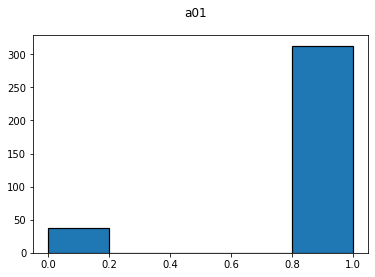

In [18]:
# 첫번째 컬럼에 대해서..
col_i = 0
plt.hist(X[:,col_i:col_i+1],
         bins=discretizer.bin_edges_[col_i],
         linewidth=1.2, edgecolor='black')
plt.suptitle(df.columns[col_i])
plt.show()

C:\Users\weezs\Anaconda3\envs\minjoo\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\weezs\Anaconda3\envs\minjoo\lib\site-packages\sklearn\preprocessing\_discretization.py:159: UserWarning: Feature 1 is constant and will be replaced with 0.
  "replaced with 0." % jj)
C:\Users\weezs\Anaconda3\envs\minjoo\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\Users\weezs\Anaconda3\envs\minjoo\lib\site-packages\sklearn\preprocessing\_discretization.py:193: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\U

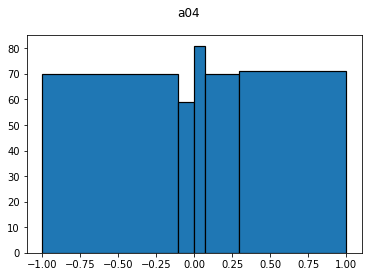

In [19]:
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
discretizer.fit(X)

col_i = 3
plt.hist(X[:,col_i:col_i+1],
         bins=discretizer.bin_edges_[col_i],
         linewidth=1.2, edgecolor='black')
plt.suptitle(df.columns[col_i])
plt.show()

In [20]:
transformed_X = discretizer.transform(X)
print(transformed_X[:3])

[[0. 0. 3. 1. 2. 2. 2. 0. 4. 2. 3. 0. 2. 0. 2. 0. 3. 0. 2. 1. 2. 1. 2. 1.
  2. 0. 1. 1. 1. 1. 2. 0. 2. 0.]
 [0. 0. 3. 0. 3. 0. 0. 0. 4. 1. 2. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
  0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 0. 3. 1. 3. 2. 3. 0. 3. 2. 2. 2. 3. 2. 2. 2. 3. 1. 3. 1. 3. 1. 2. 1.
  2. 1. 2. 1. 2. 1. 3. 1. 2. 0.]]


In [9]:
from sklearn.tree import DecisionTreeClassifier
discretizer = KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='uniform')
discretizer.fit(X)
en_X = discretizer.transform(X)

C:\Users\weezs\Anaconda3\envs\minjoo\lib\site-packages\sklearn\preprocessing\_discretization.py:159: UserWarning: Feature 1 is constant and will be replaced with 0.
  "replaced with 0." % jj)


In [11]:
clf = DecisionTreeClassifier(criterion='entropy')
cv = KFold(n_splits=10, shuffle=True, random_state=0)
print(cross_val_score(clf, en_X, y, cv=cv).mean())

0.8804761904761904
